In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

%matplotlib inline

In [4]:
data = np.load('/content/drive/MyDrive/Facial_recognition_simplilearn/ORL_faces.npz')

In [5]:
# viewing keys in data
for i in data:
  print(i) 

testY
testX
trainX
trainY


In [6]:
print('\nTrainX\n', data['trainX'], 'shape:', data['trainX'].shape)
print('\nTrainY\n', data['trainY'], 'shape:', data['trainY'].shape)
print('\nTestX\n', data['testX'], 'shape:', data['testX'].shape)
print('\nTestY\n', data['testY'], 'shape:', data['testY'].shape)


TrainX
 [[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]] shape: (240, 10304)

TrainY
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19] sha

In [7]:
#splitting dataset for training and testing
trainX, trainy, testX, testy = data['trainX'], data['trainY'], data['testX'], data['testY']

In [75]:
#normalize elements in testX and trainX
testX.flatten().max(),trainX.flatten().max()

(244.0, 244.0)

In [29]:
# maximum value in train and test data is 244. so we normalize data between 0 and 244 
X_train = trainX/244
X_test = testX/244

In [30]:
#convert images into 3D shape for feeding into CNN. As per data description the height and weight is 112x92 with 1 channel
X_train.shape

(240, 10304)

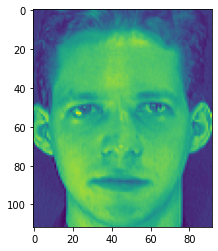

In [31]:
#plot the first image in the dataset
plt.imshow(X_train[0].reshape(112,92))

In [41]:
# converting each array into 2D for feeding into CNN
x_train = np.asarray([arr.reshape(112, 92) for arr in X_train])
x_test = np.asarray([arr.reshape(112, 92) for arr in X_test])

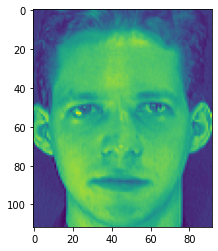

In [33]:
#plot the first image in the dataset
plt.imshow(x_train[0])

In [56]:
# reshape data to fit model
x_train = x_train.reshape(-1, 112, 92,1)
x_test = x_test.reshape(-1, 112, 92,1)

In [57]:
x_train.shape

(240, 112, 92, 1)

In [14]:
#one-hot encode target column
y_train = to_categorical(trainy)
y_test = to_categorical(testy)
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [78]:
y_train.shape

(240, 20)

In [91]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(112,92,1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='softmax'))

In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=7)

Epoch 1/7
8/8 [==============================] - 1s 41ms/step - loss: 3.8387 - accuracy: 0.0926 - val_loss: 2.8963 - val_accuracy: 0.2062
Epoch 2/7
8/8 [==============================] - 0s 22ms/step - loss: 2.8281 - accuracy: 0.2040 - val_loss: 2.6701 - val_accuracy: 0.3250
Epoch 3/7
8/8 [==============================] - 0s 21ms/step - loss: 2.3294 - accuracy: 0.5145 - val_loss: 1.9396 - val_accuracy: 0.6313
Epoch 4/7
8/8 [==============================] - 0s 21ms/step - loss: 1.3267 - accuracy: 0.8990 - val_loss: 1.0799 - val_accuracy: 0.7437
Epoch 5/7
8/8 [==============================] - 0s 21ms/step - loss: 0.4942 - accuracy: 0.8938 - val_loss: 0.8809 - val_accuracy: 0.6875
Epoch 6/7
8/8 [==============================] - 0s 20ms/step - loss: 0.2135 - accuracy: 0.9487 - val_loss: 0.5431 - val_accuracy: 0.8250
Epoch 7/7
8/8 [==============================] - 0s 22ms/step - loss: 0.0854 - accuracy: 0.9854 - val_loss: 0.4198 - val_accuracy: 0.9125


Here after 7 epochs we got both training and validation accuracy above 90%

In [94]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plotting the trainng and validation accuracy

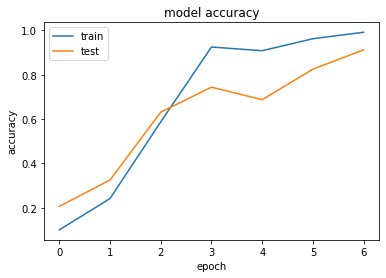

In [95]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()